In [18]:
import pandas as pd
import numpy as np
# from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
# import statistics as st
from collections import Counter
import seaborn as sns

In [19]:
data = pd.read_csv('./Desktop/Black Friday.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Task 01: Check basic statistics of dataset



In [20]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Task 02: Check for missing values in the data



In [21]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [22]:
print(len(data))

550068


### Task 03: Find unique values of data

In [23]:
for column in data.columns:
    print(column ,'-->', pd.unique(data[column]))

User_ID --> [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID --> ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender --> ['F' 'M']
Age --> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation --> [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category --> ['A' 'C' 'B']
Stay_In_Current_City_Years --> ['2' '4+' '3' '1' '0']
Marital_Status --> [0 1]
Product_Category_1 --> [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 --> [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 --> [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase --> [ 8370 15200  1422 ...   135   123   613]


### Task 04: Perform EDA

In [24]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

## Each user spends 

In [26]:
data_user = data.groupby('User_ID')['Purchase'].sum().reset_index()

mean = data_user['Purchase'].mean()
sd = np.std(data_user['Purchase'])
print('Minimum spent by a customer',data_user['Purchase'].min())
print('Maximum spent by a customer', data_user['Purchase'].max())
print('Average spent by a customer',data_user['Purchase'].mean())

Minimum spent by a customer 46681
Maximum spent by a customer 10536909
Average spent by a customer 865016.5917501273


### Most Sold product

##### Checking if there's any duplicate data

In [27]:
data.loc[data.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


### Top 10 Best Sellers

In [28]:
count = Counter()
for row in data['Product_ID']:
    
    count.update([row])
    

count.most_common(10)
    

    
    

[('P00265242', 1880),
 ('P00025442', 1615),
 ('P00110742', 1612),
 ('P00112142', 1562),
 ('P00057642', 1470),
 ('P00184942', 1440),
 ('P00046742', 1438),
 ('P00058042', 1422),
 ('P00145042', 1406),
 ('P00059442', 1406)]

### Arranging Data

In [29]:
def map_age(age_range):
    
    if age_range == "0-17":
        
        return str("Minor")
    
    elif age_range == "18-25":
        
        return str("Young Adult")
    
    elif age_range == "26-35":
        
        return str("Adult")

    elif age_range == "36-45":
        
        return str("Adult")

    elif age_range == "46-50":
        
        return str("Middle Age")
    
    elif age_range == "51-55":
        
        return str("Middle Age")

    else:
        return str("Seniors")
    
    
data['Age'] = data['Age'].apply(map_age)

In [34]:
def map_years(years):
    
    if '+' in years:
        lower  = years.split('+')[0]
        return int(lower)
    
    else:
        
        
        return int(years)
        


data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_years)

In [73]:
data['Gender'] = data['Gender'].replace({'F': 'Female',
                                        'M': 'Male'})

data['Marital_Status'] = data['Marital_Status'].replace({0: 'Unmarried',
                                        1: 'Married'})

### Finding target audience

In [75]:
# sorted_data = data.sort_values('Purchase' , ascending = False)
sorted_data = data.filter(['User_ID','Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Purchase'], axis=1)
sorted_data['Total_Purchase'] = sorted_data.groupby('User_ID')['Purchase'].transform(sum)
sorted_data = sorted_data.drop_duplicates(subset=['User_ID'])
sorted_data = sorted_data.reset_index()
sorted_data = sorted_data.drop(['index','Purchase'],axis=1)


,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Total_Purchase
0,1000001,Female,Minor,10,2,Unmarried,334093
1,1000002,Male,Seniors,16,4,Unmarried,810472
2,1000003,Male,Adult,15,3,Unmarried,341635
3,1000004,Male,Middle Age,7,2,Married,206468
4,1000005,Male,Adult,20,1,Married,821001
...,...,...,...,...,...,...,...
5886,1004588,Female,Adult,4,0,Unmarried,140990
5887,1004871,Male,Young Adult,12,2,Unmarried,108545
5888,1004113,Male,Adult,17,3,Unmarried,213550
5889,1005391,Male,Adult,7,0,Unmarried,60182


## Which Gender spent the most this year?

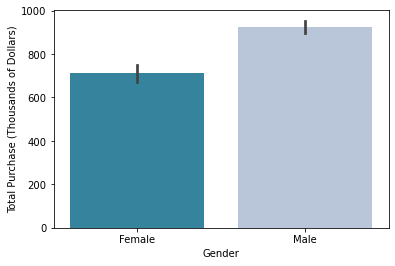

In [116]:
sns.barplot(
    x='Gender', 
    y='Total_Purchase_Thousands', 
    data=sorted_data, 
    palette='PuBuGn_r',
    )
plt.ylabel('Total Purchase (Thousands of Dollars)')
plt.show()

## People with which marital status spent the most this year?

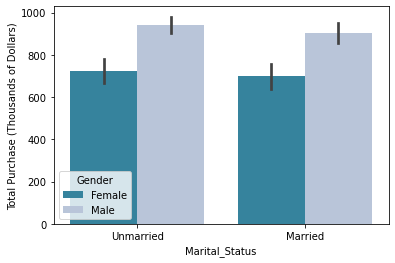

In [79]:
sns.barplot(
    x='Marital_Status', 
    y='Total_Purchase_Thousands', 
    data=sorted_data, 
    palette='PuBuGn_r',
    hue = 'Gender'
   )
plt.ylabel('Total Purchase (Thousands of Dollars)')
plt.show()

## Pdf of the amount spent

Text(0.5, 0, 'USD (Thousads of Dollars)')

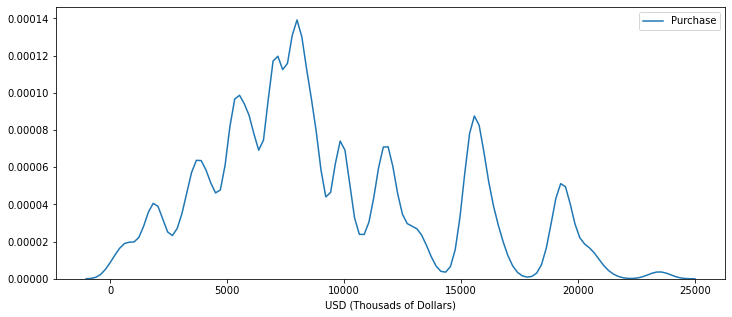

In [68]:
firg , ax = plt.subplots(ncols = 1 , figsize =(12,5))
sns.kdeplot(data['Purchase'] , ax = ax)
plt.xlabel('USD (Thousads of Dollars)')

## People with which occupation spent the most?

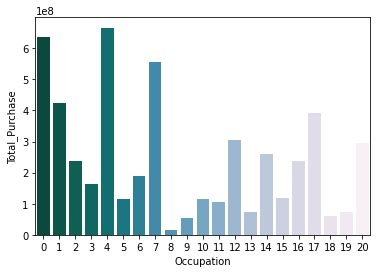

In [96]:
group_by_occupation = sorted_data.groupby('Occupation')['Total_Purchase'].sum().reset_index()
sns.barplot(x = 'Occupation',
           y = 'Total_Purchase',
           data = group_by_occupation,
           palette='PuBuGn_r')

### Which Age range spent the most?

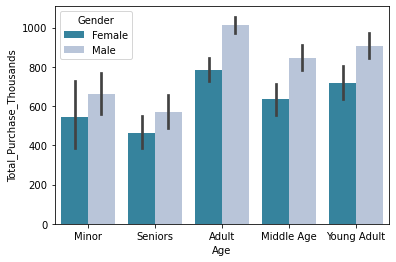

In [104]:
sns.barplot(x = 'Age' , 
            y = 'Total_Purchase_Thousands',
           data = sorted_data,
           hue = 'Gender',
           palette = 'PuBuGn_r')

## Top 10 customers of the year

In [115]:
top_customers = sorted_data.sort_values('Total_Purchase' , ascending = False).reset_index(drop=True)
top_customers = top_customers['User_ID'].head(10)
top_customers

0    1004277
1    1001680
2    1002909
3    1001941
4    1000424
5    1004448
6    1005831
7    1001015
8    1003391
9    1001181
Name: User_ID, dtype: int64